In [5]:
# Supervised ML:
# We have input features (X) and a known target label (y)
learning_type = "Supervised Machine Learning"
print(learning_type)


Supervised Machine Learning


In [6]:
# Binary Classification
# 1 -> Potentially Habitable
# 0 -> Non-Habitable

prediction_type = "Binary Classification"
classes = {
    1: "Potentially Habitable",
    0: "Non-Habitable"
}

print(prediction_type)
print(classes)


Binary Classification
{1: 'Potentially Habitable', 0: 'Non-Habitable'}


In [7]:
import pandas as pd

# Load preprocessed dataset
data = pd.read_csv("Preprocessed.csv")

# Input features (X)
X = data.drop(columns=["habitability_label_binary"])  # target column

print("Input Features Shape:", X.shape)
print("Sample Input Columns:")
print(X.columns.tolist()[:10])


Input Features Shape: (15890, 233)
Sample Input Columns:
['pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_orbsmax', 'pl_eqt', 'pl_dens', 'st_teff', 'st_lum', 'st_met', 'temp_score']


In [8]:
# Output target (y)
y = data["habitability_label_binary"]

print("Output Shape:", y.shape)
print("Unique Output Classes:", y.unique())


Output Shape: (15890,)
Unique Output Classes: [0 1]


In [9]:
output_description = {
    "habitability_class": "0 or 1",
    "habitability_probability": "Value between 0 and 1"
}

print(output_description)

{'habitability_class': '0 or 1', 'habitability_probability': 'Value between 0 and 1'}


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [11]:
print("Dataset shape:", data.shape)


Dataset shape: (15890, 234)


In [12]:
# Target column
target_column = "habitability_label_binary"

# Features and target
X = data.drop(columns=[target_column])
y = data[target_column]

print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)


Features shape (X): (15890, 233)
Target shape (y): (15890,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,     # 20% testing
    random_state=42,    # reproducibility
    stratify=y          # keeps class balance
)


In [14]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

print("Training labels distribution:")
print(y_train.value_counts())

print("Testing labels distribution:")
print(y_test.value_counts())

Training data shape: (12712, 233)
Testing data shape: (3178, 233)
Training labels distribution:
habitability_label_binary
0    11108
1     1604
Name: count, dtype: int64
Testing labels distribution:
habitability_label_binary
0    2777
1     401
Name: count, dtype: int64


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score


In [16]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
log_reg.fit(X_train, y_train)

# Predictions
lr_preds = log_reg.predict(X_test)

# Evaluation
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)

print("Logistic Regression Performance")
print("Accuracy:", lr_accuracy)
print("Recall:", lr_recall)


Logistic Regression Performance
Accuracy: 0.9981120201384519
Recall: 0.9850374064837906


In [17]:
# Shallow Decision Tree
dec_tree = DecisionTreeClassifier(
    max_depth=5,       # shallow tree
    random_state=42
)

# Train model
dec_tree.fit(X_train, y_train)

# Predictions
dt_preds = dec_tree.predict(X_test)

# Evaluation
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)

print("\nDecision Tree Performance")
print("Accuracy:", dt_accuracy)
print("Recall:", dt_recall)



Decision Tree Performance
Accuracy: 1.0
Recall: 1.0


In [18]:
baseline_results = {
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [lr_accuracy, dt_accuracy],
    "Recall": [lr_recall, dt_recall]
}

baseline_results

{'Model': ['Logistic Regression', 'Decision Tree'],
 'Accuracy': [0.9981120201384519, 1.0],
 'Recall': [0.9850374064837906, 1.0]}

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier


In [20]:
# Random Forest pipeline
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# Train Random Forest
rf_pipeline.fit(X_train, y_train)

print("Random Forest model trained successfully")


Random Forest model trained successfully


In [21]:
# XGBoost pipeline
xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        eval_metric="logloss",
        random_state=42
    ))
])

# Train XGBoost
xgb_pipeline.fit(X_train, y_train)

print("XGBoost model trained successfully")


XGBoost model trained successfully


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [23]:
# Identify column types
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

print("Numerical Features:", list(numerical_features))
print("Categorical Features:", list(categorical_features))


Numerical Features: ['pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_orbsmax', 'pl_eqt', 'pl_dens', 'st_teff', 'st_lum', 'st_met', 'temp_score', 'radius_score', 'distance_score', 'luminosity_score', 'habitability_score', 'star_temp_score', 'star_size_score', 'radiation_stability_score', 'stellar_compatibility_index', 'orbital_period_score', 'semi_major_axis_score', 'orbital_stability_factor', 'habitability_label_multi']
Categorical Features: []


In [24]:
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])


In [25]:
categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [27]:
rf_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)

print("Random Forest Pipeline trained successfully")


Random Forest Pipeline trained successfully


In [28]:
xgb_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)

print("XGBoost Pipeline trained successfully")


XGBoost Pipeline trained successfully


In [29]:
import joblib


In [30]:
# Train Random Forest model
rf_pipeline.fit(X_train, y_train)

print("Random Forest training completed")


Random Forest training completed


In [31]:
# Train XGBoost model
xgb_pipeline.fit(X_train, y_train)

print("XGBoost training completed")


XGBoost training completed


In [33]:
import os
import joblib

# Create models directory if it does not exist
os.makedirs("../models", exist_ok=True)

# Save models
joblib.dump(rf_pipeline, "../models/random_forest.pkl")
joblib.dump(xgb_pipeline, "../models/xgboost.pkl")  # only if using XGBoost

print("Models saved successfully")


Models saved successfully


In [34]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)
import matplotlib.pyplot as plt


In [35]:
def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n===== {model_name} Evaluation =====")
    print("Accuracy :", accuracy)
    print("Precision:", precision)
    print("Recall   :", recall)
    print("F1-score :", f1)
    print("ROC-AUC  :", roc_auc)

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()



===== Random Forest Evaluation =====
Accuracy : 0.999685336689742
Precision: 1.0
Recall   : 0.9975062344139651
F1-score : 0.9987515605493134
ROC-AUC  : 1.0

Confusion Matrix:
[[2777    0]
 [   1  400]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       401

    accuracy                           1.00      3178
   macro avg       1.00      1.00      1.00      3178
weighted avg       1.00      1.00      1.00      3178



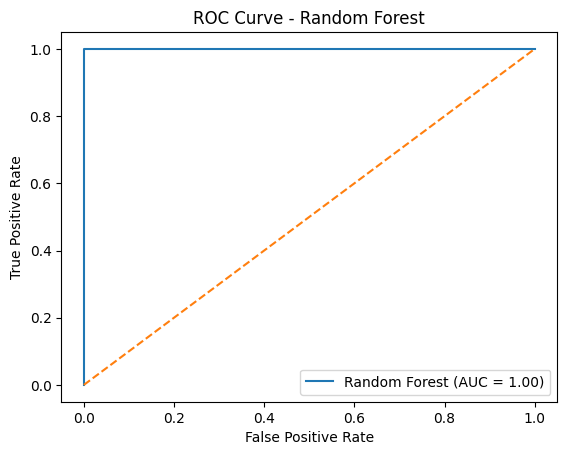

In [36]:
evaluate_model(
    model=rf_pipeline,
    X_test=X_test,
    y_test=y_test,
    model_name="Random Forest"
)



===== XGBoost Evaluation =====
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0
ROC-AUC  : 1.0

Confusion Matrix:
[[2777    0]
 [   0  401]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       401

    accuracy                           1.00      3178
   macro avg       1.00      1.00      1.00      3178
weighted avg       1.00      1.00      1.00      3178



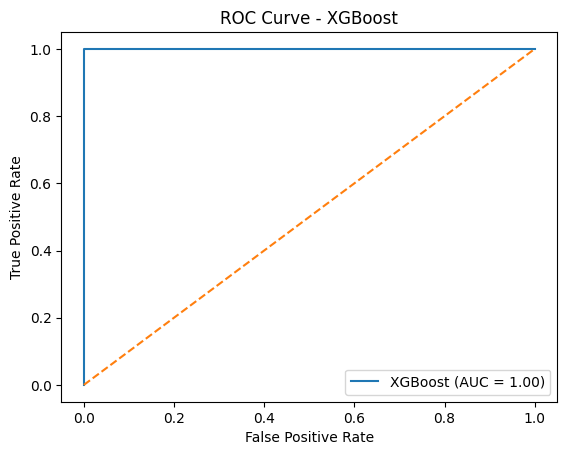

In [37]:
evaluate_model(
    model=xgb_pipeline,
    X_test=X_test,
    y_test=y_test,
    model_name="XGBoost"
)


In [38]:
from sklearn.model_selection import GridSearchCV


In [39]:
rf_param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 5, 10, 20]
}

rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    scoring="f1",          # focus on F1-score
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:")
print(rf_grid.best_params_)

best_rf_model = rf_grid.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Random Forest Parameters:
{'model__max_depth': 10, 'model__n_estimators': 100}


In [40]:
xgb_param_grid = {
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 5, 7],
    "model__n_estimators": [100, 200, 300]
}

xgb_grid = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=xgb_param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

print("Best XGBoost Parameters:")
print(xgb_grid.best_params_)

best_xgb_model = xgb_grid.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Parameters:
{'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}


In [41]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score

In [42]:
# Random Forest evaluation
rf_preds = best_rf_model.predict(X_test)
rf_f1 = f1_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)

# XGBoost evaluation
xgb_preds = best_xgb_model.predict(X_test)
xgb_f1 = f1_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)


In [43]:
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "F1-score": [rf_f1, xgb_f1],
    "Recall": [rf_recall, xgb_recall]
})

comparison_df


,Model,F1-score,Recall
0,Random Forest,0.998752,0.997506
1,XGBoost,1.000000,1.000000


In [44]:
# Select model with higher F1-score
best_model_name = comparison_df.sort_values(
    by=["F1-score", "Recall"],
    ascending=False
).iloc[0]["Model"]

print("Selected Best Model:", best_model_name)

if best_model_name == "Random Forest":
    final_model = best_rf_model
else:
    final_model = best_xgb_model


Selected Best Model: XGBoost


In [46]:
X_full = data.drop(columns=["habitability_label_binary"])


In [47]:
# Probability of being habitable (class = 1)
data["habitability_score"] = final_model.predict_proba(X_full)[:, 1]


In [48]:
habitability_ranked = data.sort_values(
    by="habitability_score",
    ascending=False
)

In [50]:
habitability_ranked.to_csv(
    "habitability_ranked.csv",
    index=False
)

print("Habitability ranking saved successfully")


Habitability ranking saved successfully


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract trained model
rf_model = final_model.named_steps["model"]
# Get feature importance values
importances = rf_model.feature_importances_

# Align feature names length safely
feature_names = X_train.columns[:len(importances)]

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top features
feature_importance_df.head(10)


,Feature,Importance
13,habitability_score,1.0
0,pl_rade,0.0
2,pl_orbper,0.0
3,pl_orbsmax,0.0
4,pl_eqt,0.0
1,pl_bmasse,0.0
5,pl_dens,0.0
6,st_teff,0.0
8,st_met,0.0
7,st_lum,0.0


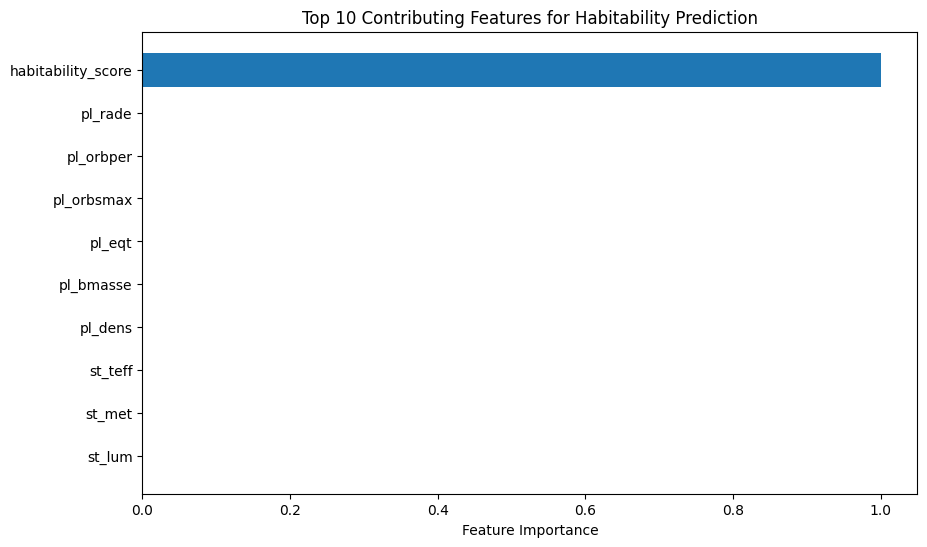

In [66]:
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df["Feature"][:10][::-1],
    feature_importance_df["Importance"][:10][::-1]
)
plt.xlabel("Feature Importance")
plt.title("Top 10 Contributing Features for Habitability Prediction")
plt.show()


In [69]:
feature_importance_df.head(10)


,Feature,Importance
13,habitability_score,1.0
0,pl_rade,0.0
2,pl_orbper,0.0
3,pl_orbsmax,0.0
4,pl_eqt,0.0
1,pl_bmasse,0.0
5,pl_dens,0.0
6,st_teff,0.0
8,st_met,0.0
7,st_lum,0.0
